

---


Nombre de los integrantes

- Cruz Pérez Joshua Santiago
- Hernández Banda Oziel
- Jimenez Borzani Naomi Daniela
- Paredes Hernández Ximena


---

4. Hallar una aproximación a $\sqrt{3}$ con una tolerancia de $10^{-4}$ usando el algoritmo de Bisección. [Hint: considerar $f(x)=x^2-3$.]

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def biseccion(a, b, f):
    """
    Método de Bisección para encontrar raíces en un intervalo.

    Requiere que la función cambie de signo en el intervalo [a, b].
    En cada iteración divide el intervalo a la mitad y selecciona el subintervalo
    donde ocurre el cambio de signo.

    Parámetros:
    a : float
        Extremo izquierdo del intervalo inicial
    b : float
        Extremo derecho del intervalo inicial (debe cumplir f(a)*f(b) < 0)
    f : function
        Función continua donde buscar la raíz

    Retorna:
    list : Lista de todos los puntos medios calculados

    Excepciones:
    ValueError : Si no hay cambio de signo en los extremos del intervalo

    Notas:
    - Convergencia garantizada para funciones continuas con cambio de signo
    - Convergencia lineal (más lento que Newton o Secante)
    - Cada iteración reduce el intervalo a la mitad
    """
    # Verificar condición fundamental del método
    if f(a) * f(b) >= 0:
        raise ValueError("La función debe tener signos opuestos en los extremos del intervalo")

    tol = 1e-4  # Tolerancia (tamaño mínimo del intervalo)
    max_iter = 100  # Límite de seguridad para iteraciones
    m = []  # Lista para almacenar puntos medios
    iter_count = 0  # Contador de iteraciones

    # Iterar hasta que el intervalo sea menor que la tolerancia
    while b - a > tol and iter_count < max_iter:
        m_aux = (a + b) / 2.0  # Calcular punto medio
        m.append(m_aux)  # Almacenar punto medio

        # Seleccionar subintervalo donde cambia el signo
        if f(a) * f(m_aux) < 0:
            b = m_aux  # La raíz está en [a, m_aux]
        else:
            a = m_aux  # La raíz está en [m_aux, b]

        iter_count += 1  # Incrementar contador

    return m


def graficar_funcion(f, a, b, raiz=None, titulo=""):
    """
    Genera una gráfica de la función f en el intervalo [a, b].

    Parámetros:
    - f (func): función a graficar
    - a (float): límite inferior
    - b (float): límite superior
    - raiz (float): raíz estimada a marcar en la gráfica (opcional)
    - titulo (str): título de la gráfica
    """
    x = np.linspace(a, b, 400)
    y = f(x)
    plt.figure()
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', linestyle='--')
    if raiz is not None:
        plt.plot(raiz, f(raiz), 'ro', label=f'Raíz ≈ {raiz:.6f}')
    plt.title(titulo)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


[1.5, 1.25, 1.375, 1.4375, 1.46875, 1.453125, 1.4453125, 1.44140625, 1.443359375, 1.4423828125, 1.44189453125, 1.442138671875, 1.4422607421875, 1.44219970703125]


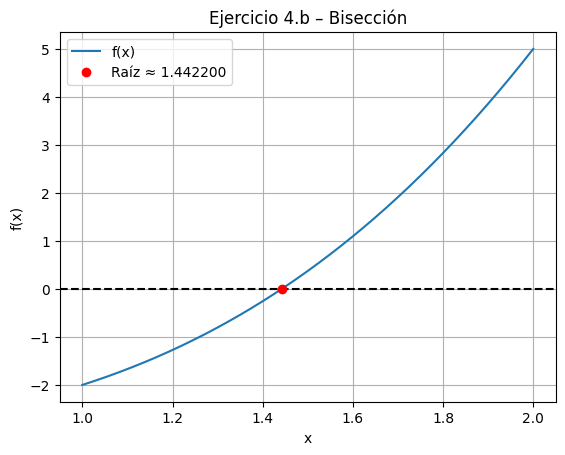

In [6]:
def f1(x):
  return (x**3) - 3
#imprimimos las aproximaciones
print(biseccion(1, 2, f1))
#retomamos las raices a graficar
raices = biseccion(1, 2, f1)
#graficamos
graficar_funcion(f1, 1, 2, raices[-1], "Ejercicio 4.b – Bisección")